# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
 

In [53]:

# Load the dataset into a DataFrame
file_path = "C:\\Users\\Waleed\\Desktop\\ml-project-unsupervised-learning\\Wholesale_Data.csv"
wholesale_data = pd.read_csv(file_path)
print(wholesale_data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


- Data Cleaning & Data Description:: 

- There are no negative values
- The minimum values for the Fresh, Grocery, Detergents_Paper, and Delicassen columns are low. this could be an error or might be an usual data entery. 
- There is a wide range of values in many columns, indicating the presence of potential outliers 

In [54]:
# Check for missing values
missing_values = wholesale_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Display summary statistics
summary_statistics = wholesale_data.describe()
print("\nSummary Statistics:\n", summary_statistics)

Missing Values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Summary Statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.00

- Data Visualization:
- Histograms: The histograms provide insight into the distribution of each column in the dataset. Most columns are right-skewed, indicating that there are a few customers who spend much more than the average.
- Box Plots: The box plots highlight the presence of potential outliers in almost all columns. These outliers represent customers with exceptionally high spending in particular categories.
- Scatter Plots: The scatter plot between "Fresh" and "Milk" shows a slight positive correlation, indicating that as spending on fresh products increases, spending on milk products tends to increase as well. 
- Heat Map: The heatmap of the correlation matrix provides insights into the linear relationships between the variables

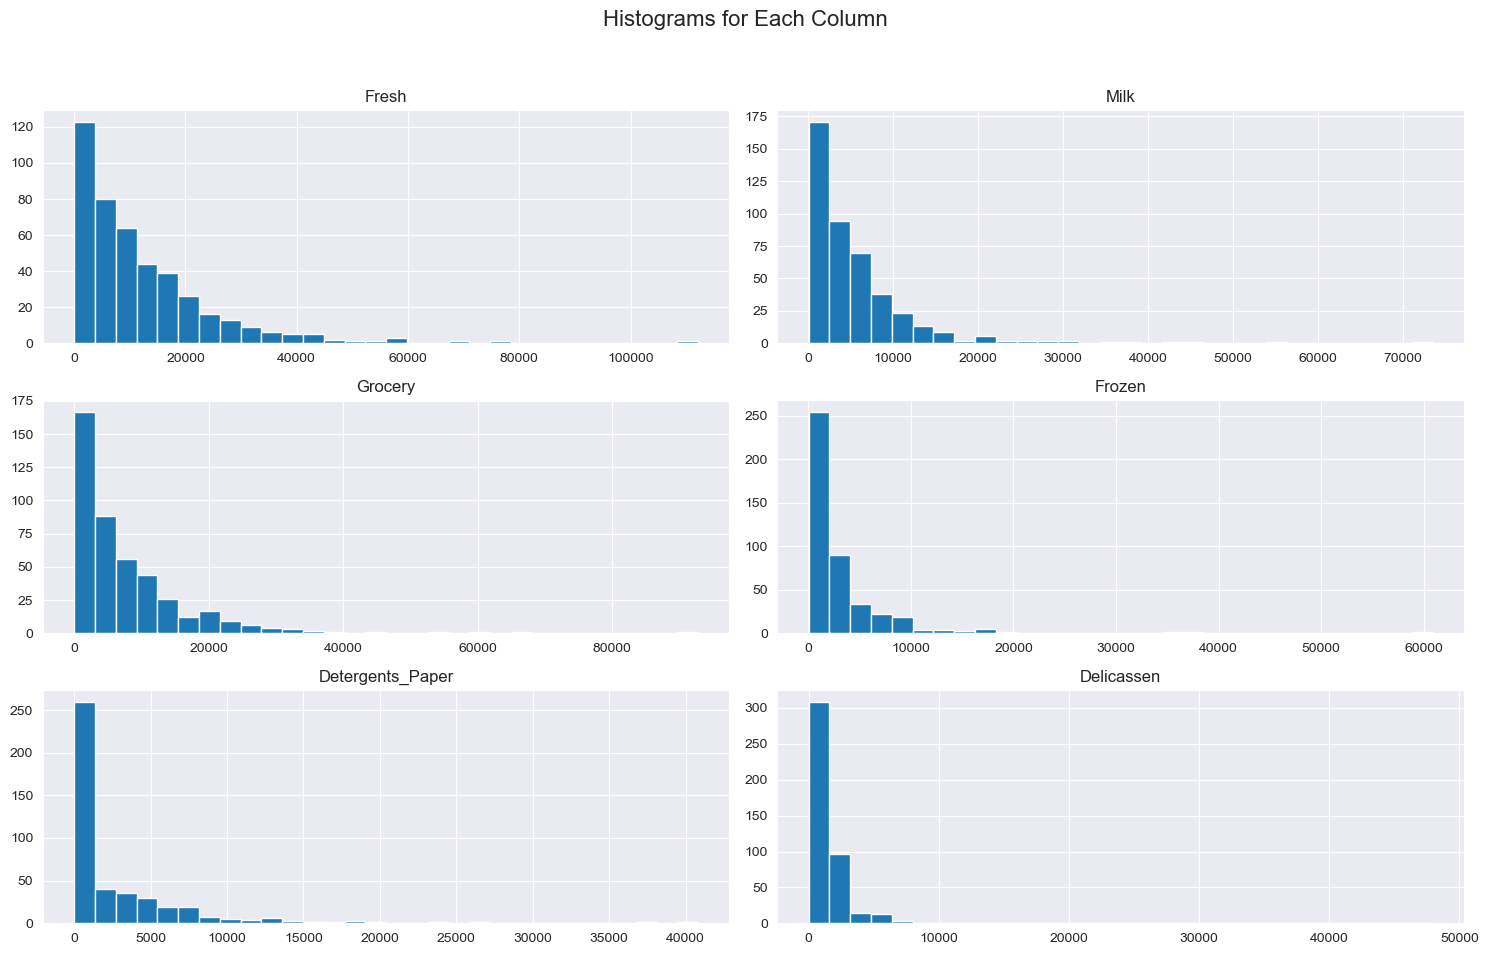

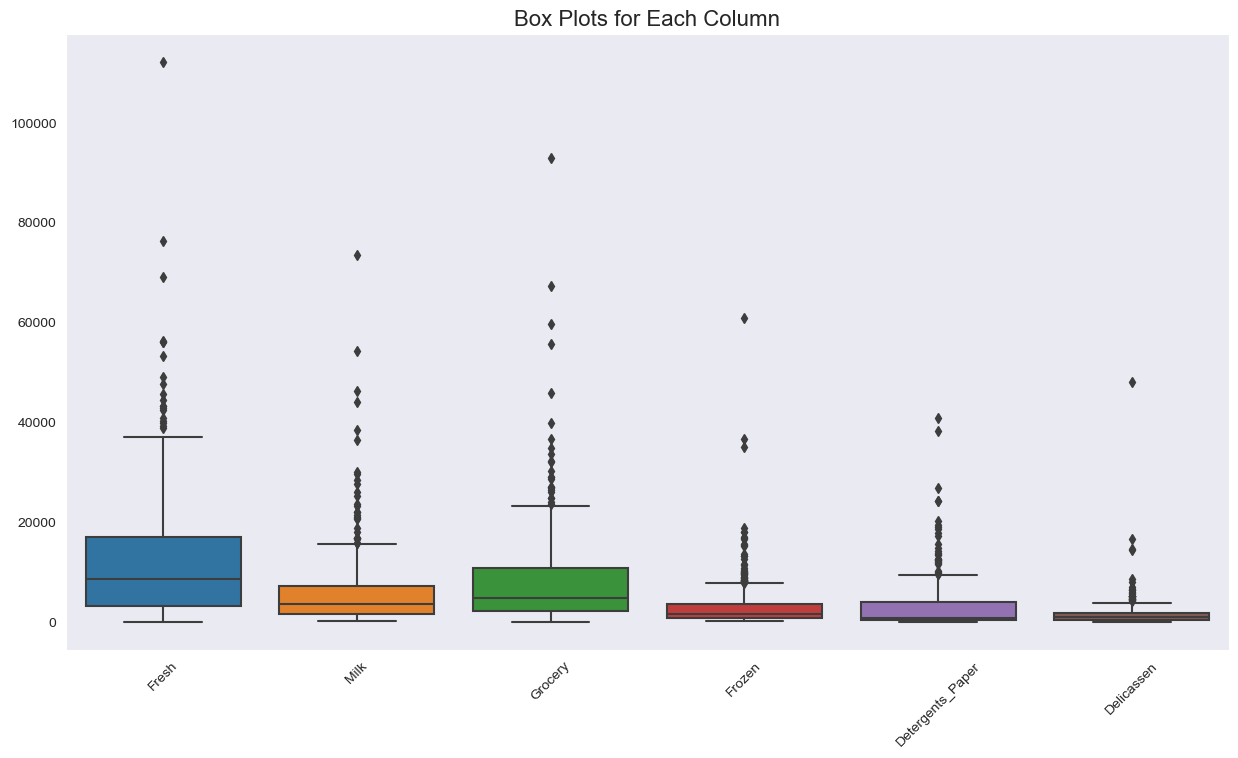

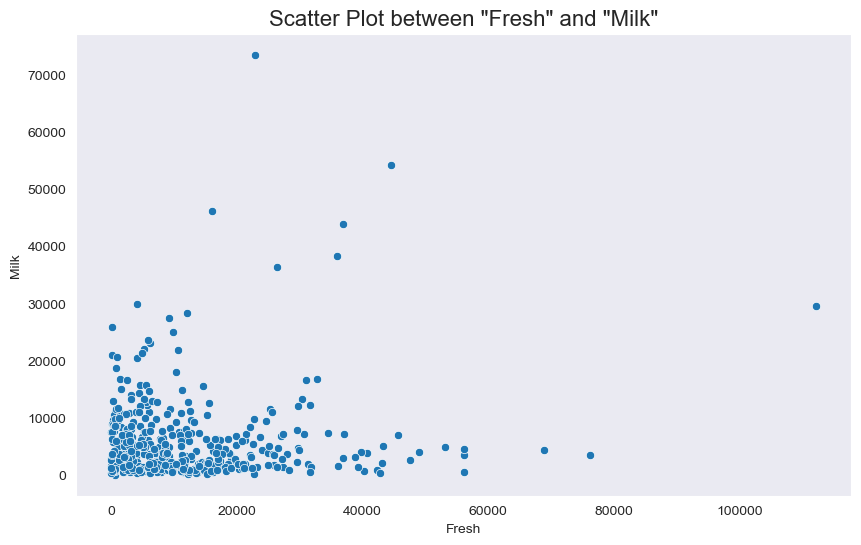

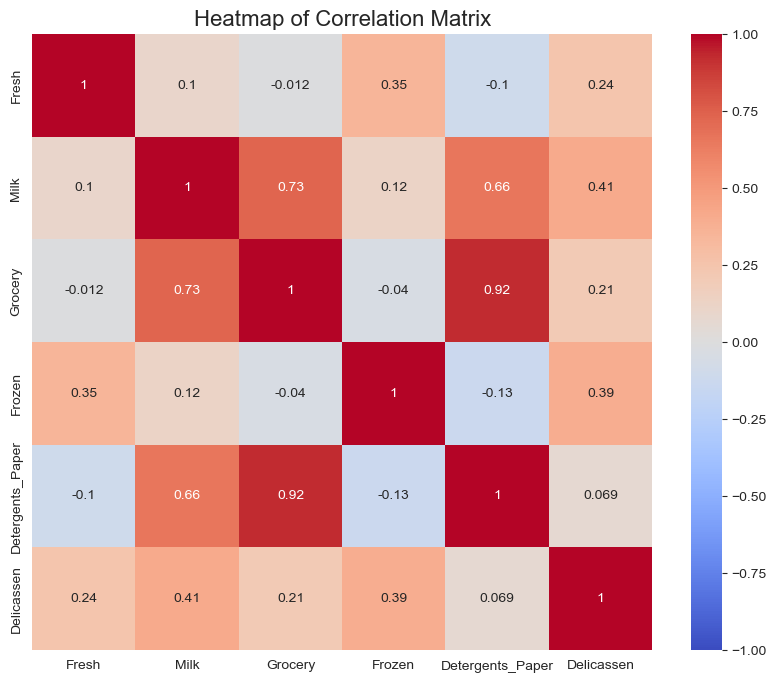

In [55]:

sns.set_style("dark")

# Histograms
wholesale_data.drop(['Channel', 'Region'], axis=1).hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Each Column', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=wholesale_data.drop(['Channel', 'Region'], axis=1))
plt.title('Box Plots for Each Column', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Scatter plot for "Fresh" and "Milk"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wholesale_data, x="Fresh", y="Milk")
plt.title('Scatter Plot between "Fresh" and "Milk"', fontsize=16)
plt.show()

# Heatmap of correlation matrix
correlation_matrix = wholesale_data.drop(['Channel', 'Region'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

- Outlier Detection: Outliers are shown below
- If this dataset represents a wide range of customers, from small cafes to large hotels, then large purchases might be valid.
- Extremely low values might indicate data entry errors or might be valid small purchases.

In [56]:
# Compute IQR for each column and identify outliers
outliers = {}
for column in wholesale_data.columns:
    if wholesale_data[column].dtype != 'object':  
        Q1 = wholesale_data[column].quantile(0.25)
        Q3 = wholesale_data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = wholesale_data[(wholesale_data[column] < lower_bound) | (wholesale_data[column] > upper_bound)]

outliers_count = {column: len(values) for column, values in outliers.items() if len(values) > 0}
print(outliers_count)

{'Fresh': 20, 'Milk': 28, 'Grocery': 24, 'Frozen': 43, 'Detergents_Paper': 30, 'Delicassen': 27}


- Correlation Analysis: using the above heat map, A value of 1 implies a perfect positive correleation, a value of -1 implies a perfect negative correlation and a value of 0 implies no correlation.
- grocery & Detergant: With a correlation value of approximately 0.9246, there's a very strong positive linear relationship between "Grocery" and "Detergents_Paper". 
- Milk and others: Milk" and "Grocery" have a correlation of 0.7283, Clients who purchase more milk products also tend to buy more groceries.
- "Milk" and "Detergents_Paper" have a correlation of 0.6618. indicating a relationship between milk purchases and detergents/paper purchases.
- "Fresh" products and other categories generally have low correlations, indicating that spending on fresh products doesn't strongly predict spending on other categories.

- Data Transformation
- The distributions for each spending category appear more symmetric and less skewed.
- The extreme values (potential outliers) have been reduced in magnitude, making the distributions more compact.

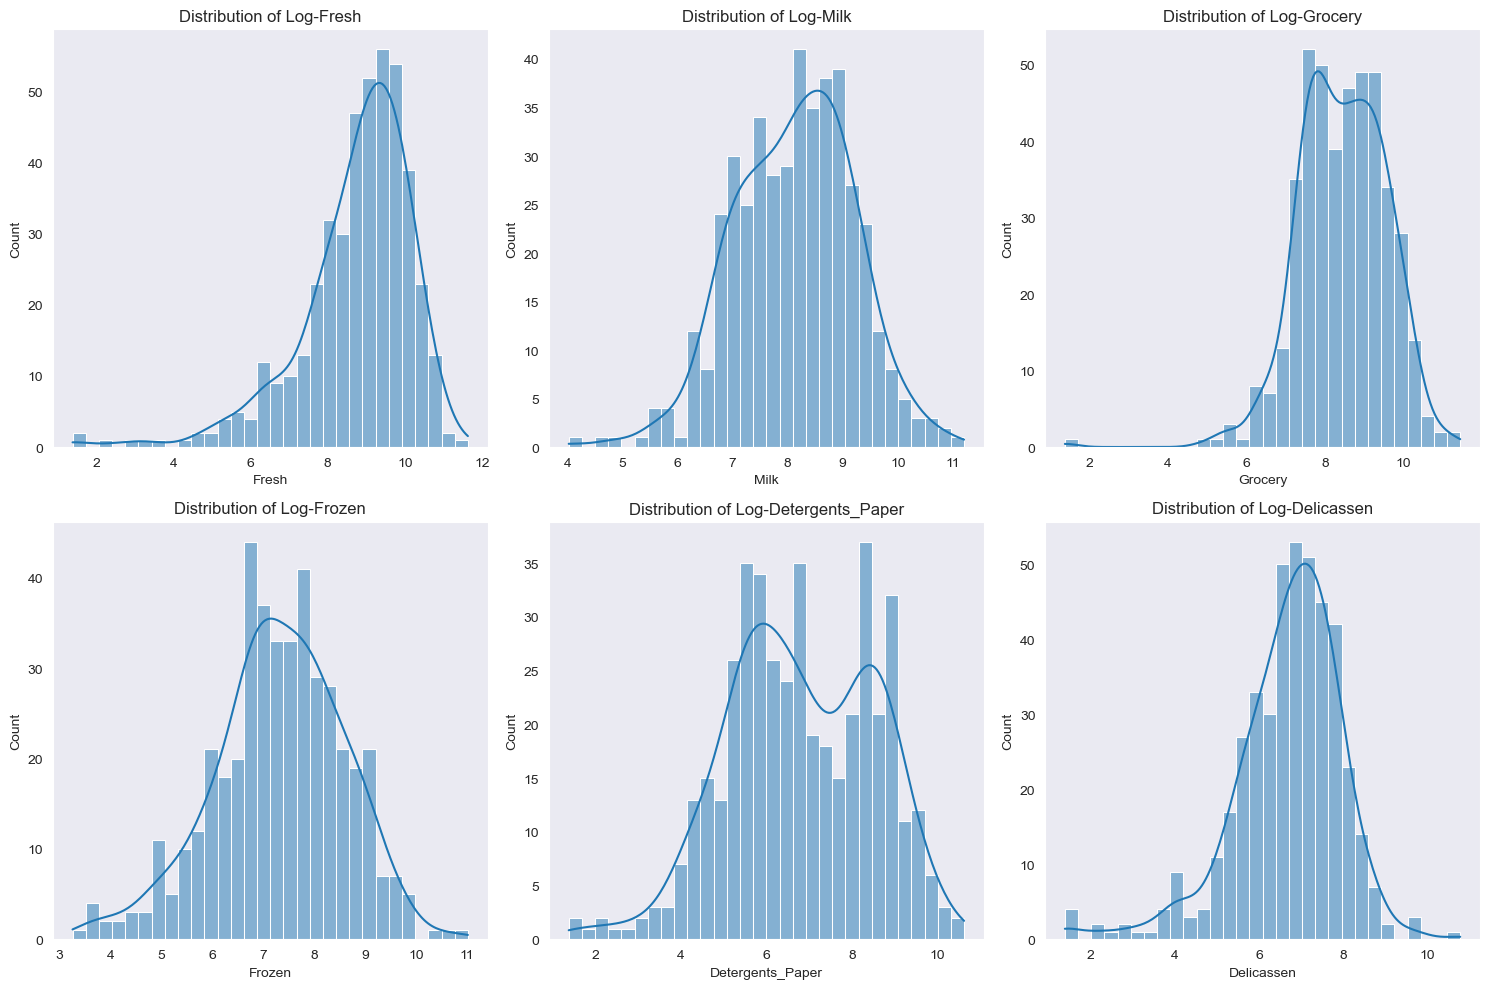

In [57]:
spending_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
log_transformed_data = wholesale_data[spending_categories].apply(lambda x: np.log1p(x))

plt.figure(figsize=(15, 10))
for idx, category in enumerate(spending_categories, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(log_transformed_data[category], kde=True, bins=30)
    plt.title(f'Distribution of Log-{category}')
plt.tight_layout()
plt.show()


- Feature Selection:
- Explained Variance Ratio: 
- The first principal component explains approximately 44.08%44.08% of the total variance in the dataset.
- The second principal component explains about 28.38%28.38% of the variance.
- Cumulatively, the first two components explain about 72.46%72.46% of the variance. The first four components together explain over 94.19%94.19% of the variance.

In [58]:
numerical_data = wholesale_data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

pca = PCA()
pca.fit(standardized_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
pca_components = pca.components_

print(explained_variance_ratio)
print(cumulative_explained_variance)
print(pca_components)

[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]
[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

- We applied a logarithmic transformation to handle the skewness in our dataset.
- We standardized our data to ensure that all features have zero mean and unit variance, making them equally important for clustering.
- We used the elbow method to determine the optimal number of clusters by plotting the sum of squared distances (inertia) for a range of cluster numbers.
- The point where the reduction in inertia begins to slow down (the "elbow") suggests the optimal number of clusters.
- We initialized KMeans with 3 clusters based on our observation from the elbow plot.
- Data points were assigned to the nearest centroid, and centroids were updated until the algorithm converged.
- We used PCA to reduce the dimensionality of our data to two principal components for visualization.
- This 2D scatter plot gives us a visual representation of how our data points are grouped into clusters.
- We can interpret the clusters by examining the average values of each feature within each cluster.
- This gives insight into the defining characteristics of each cluster, helping in understanding the nature of the groups formed.

c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

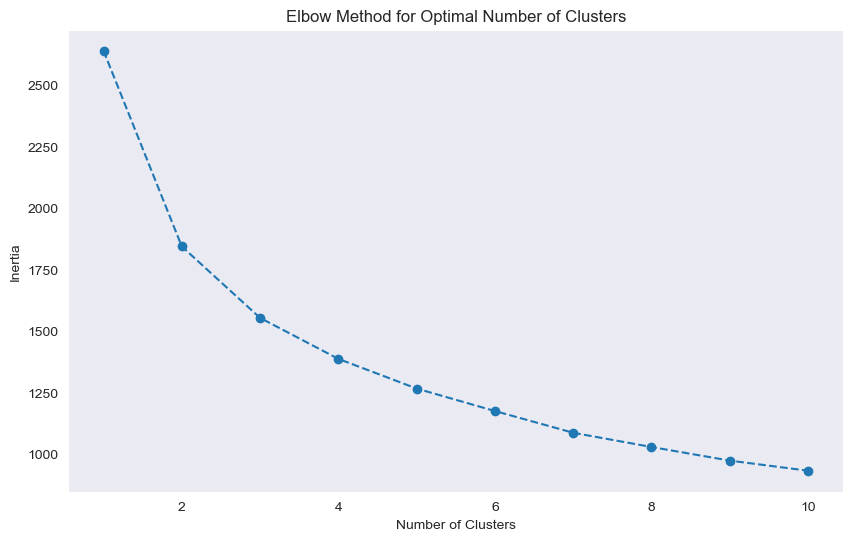

c:\Users\Waleed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


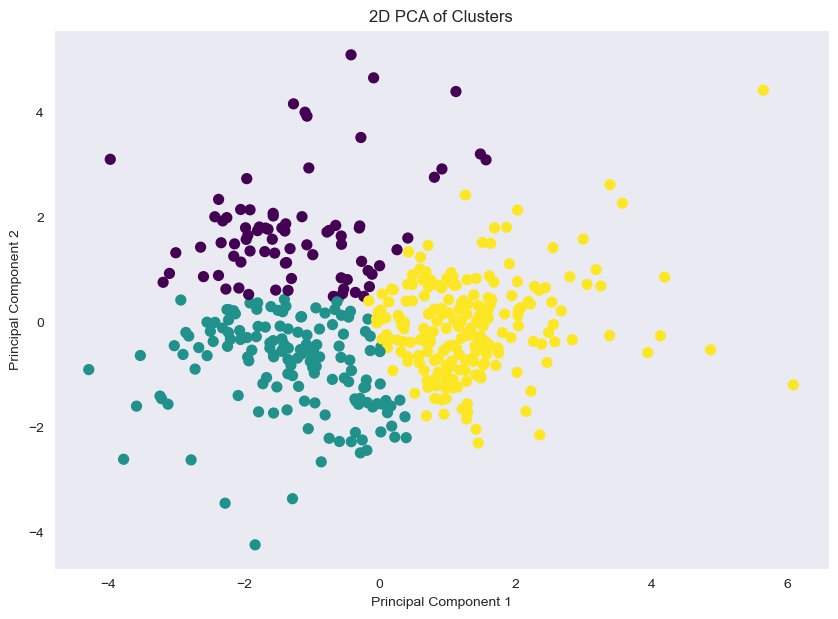

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.600000  2.525000   2898.575000   7135.937500  12569.712500   
1        1.619048  2.612245  17042.836735  10559.666667  13333.598639   
2        1.014085  2.502347  11938.723005   2005.685446   2502.093897   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0         606.550000       5554.387500   782.862500  
1        4133.095238       4987.020408  2846.591837  
2        3265.544601        424.478873   891.384977  


In [59]:
log_transformed_data = wholesale_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].apply(np.log1p)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_transformed_data)
from sklearn.cluster import KMeans

# Determine optimal number of clusters using elbow method
inertia = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clusters')
plt.show()

wholesale_data['Cluster'] = cluster_labels
print(wholesale_data.groupby('Cluster').mean())




# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

- Hierarchical clustering is sensitive to the scale of data.
- We've already transformed and standardized our data to ensure that all features are on a similar scale and are equally important for clustering.
- We used the "ward" linkage method, which minimizes the variance of the distances between the clusters being merged.
- The dendrogram visually represents the sequence in which data points and clusters are merged.
- The vertical distance between branches represents the distance between clusters.
- We can use the dendrogram to visually determine a good distance cutoff to specify the number of clusters.
- By examining where the branches of the dendrogram are long (indicating dissimilarity), we can cut the dendrogram to define our clusters.
- We added the cluster labels from the hierarchical clustering to our original dataframe.
- This allows us to analyze the characteristics of each hierarchical cluster, providing insights into the nature of the groups formed.

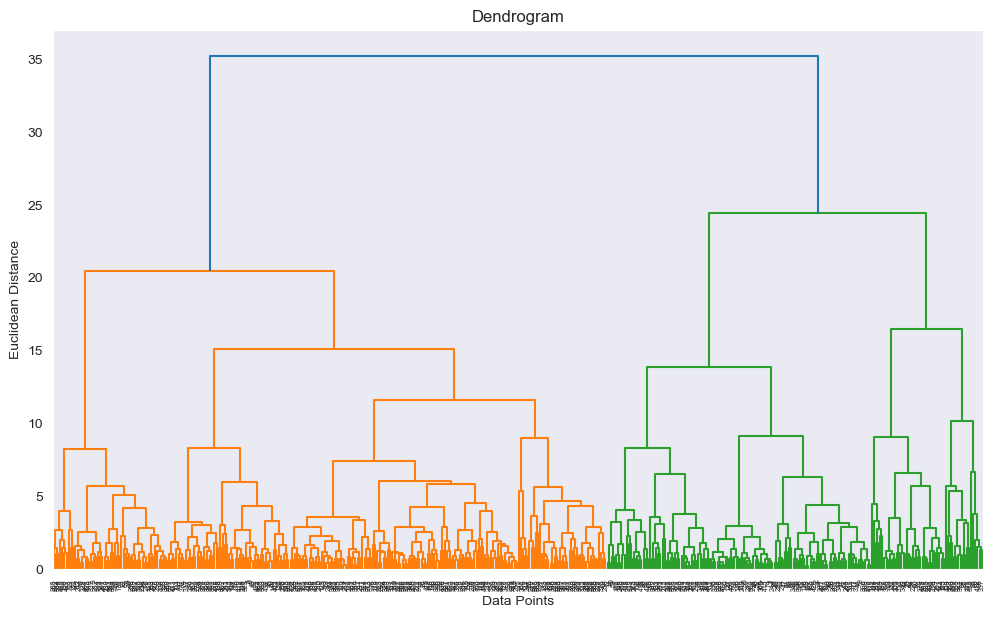

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster  Hierarchical_Cluster  
0          1338        1                     4  
1          1776        1 

In [60]:

Z = linkage(scaled_data, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.xlabel('Data Points')
plt.show()

clusters = fcluster(Z, t=15, criterion='distance')
wholesale_data['Hierarchical_Cluster'] = clusters
print (wholesale_data)


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

- PCA identifies the axes (principal components) in the data that maximize variance.
- The first principal component captures the most variance, the second principal component (which is orthogonal to the first) captures the second most, and so on.
- This plot shows the amount of variance captured by each principal component.

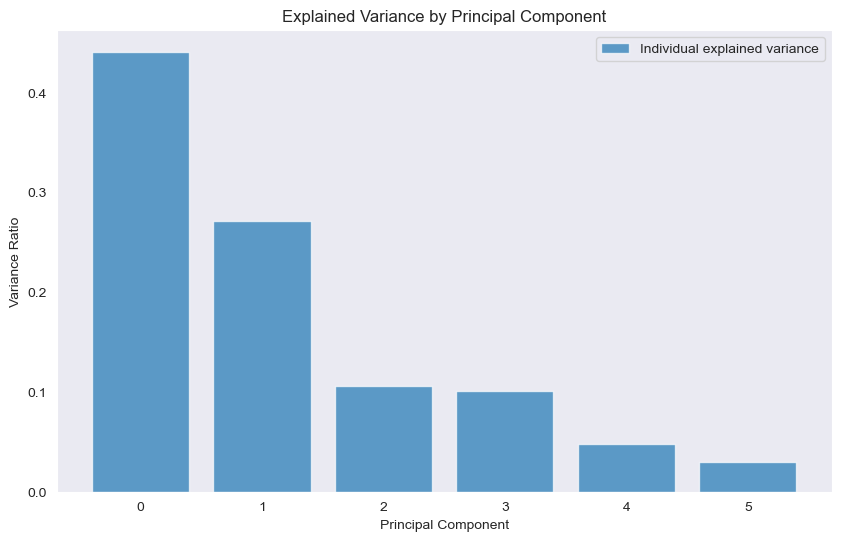

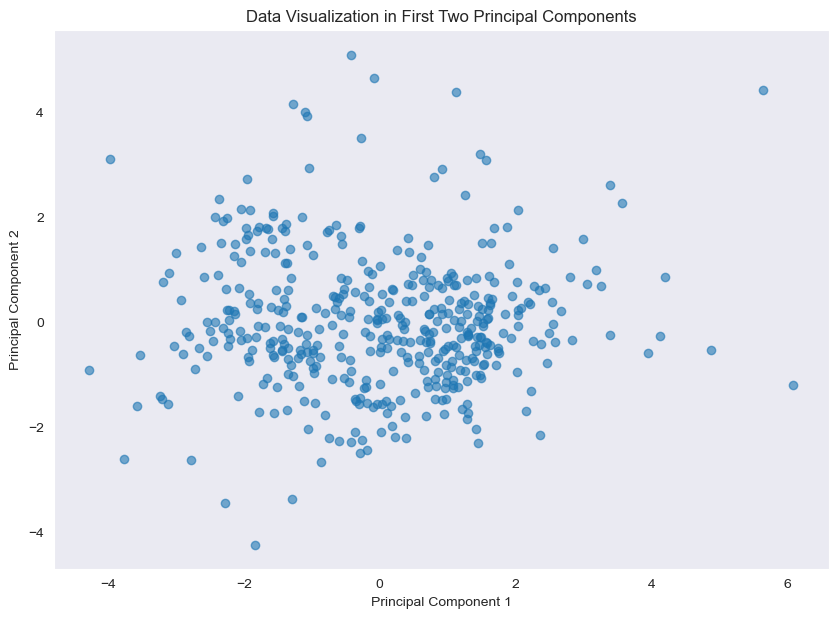

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1  0.105250 -0.542329 -0.571472  0.137910         -0.550642   -0.214469
PC2 -0.590359 -0.132911  0.005751 -0.589778          0.070822   -0.530022
PC3 -0.639563 -0.073636 -0.133333 -0.021176         -0.199531    0.726291
PC4 -0.478600  0.061769  0.096528  0.792031          0.082823   -0.351619
PC5 -0.040337  0.759954 -0.092903 -0.073193         -0.620419   -0.148105


In [63]:


pca = PCA()
principal_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.7, label='Individual explained variance')

plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()





# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- People Buy Fresh More: Most customers buy more fresh items than any other product.

- Different Buying Groups: We found groups of customers who buy things differently. Some buy more milk and groceries, while others buy lots of fresh items.

- Groups Within Groups: Our tree-like chart (dendrogram) shows that some customer groups can be split into smaller groups. It's like having categories and sub-categories.

- Some Items Are Bought Together: When people buy more milk, they often also buy more groceries and cleaning stuff. They seem to go together in shopping lists.